## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) ) 


In [4]:
# link necessary libraries
library(tidyverse)
library(corrplot)

# settings for plot visualisation
options(repr.plot.height = 5, repr.plot.res = 200)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



Načítanie datasetu - dataset viete funkciami dostupnými v R stiahnuť a rozbaliť aj z formátu ZIP

In [6]:
# URL of the dataset
dataset_url <- "https://archive.ics.uci.edu/static/public/519/heart+failure+clinical+records.zip"

# create temporary destination file path with .zip extension
dest_file <- tempfile(fileext = ".zip")

# download the dataset, mode = write binary
download.file(dataset_url, destfile = dest_file, mode = "wb")

# unzip the file into chosen location (enter directory)
unzip(dest_file, exdir = "data/") # TODO fill in

### Úloha 1 (1b)

Načítajte dataset do premennej `data_hw`.

In [18]:
data_hw  <- read.csv("data/heart_failure_clinical_records_dataset.csv")

#contains_na <- any(is.na(data_hw))
#print(contains_na) 
#str(data_hw)
#contains_duplicates <- any(duplicated(data_hw) | duplicated(data_hw, fromLast = TRUE))
#print(contains_duplicates)

[1] FALSE


   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

**Obsahuje dataset duplicitné záznamy?**

### Úloha 2 (1b)

Skúmajte premennú 'sex' (pohlavie). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž) 


In [21]:
pocty_pohlavi <- table(data_hw$sex, data_hw$smoking )
print(pocty_pohlavi)

   
      0   1
  0 101   4
  1 102  92


**Koľko záznamov mužov a žien obsahuje dataset?**

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

### Úloha 3 (1b)

Popíšte premennú 'age' (vek).

In [26]:
# Minimálny vek
min_age <- min(data_hw$age)

# Maximálny vek
max_age <- max(data_hw$age)

# Priemerný vek
mean_age <- mean(data_hw$age)

# Vypísanie výsledkov
print(paste("Minimálny vek:", min_age))
print(paste("Maximálny vek:", max_age))
print(paste("Priemerný vek:", mean_age))


age_counts <- table(data_hw$age)

# Nájdenie veku s najväčším počtom záznamov
most_common_age <- names(which.max(age_counts))
print(most_common_age)


[1] "Minimálny vek: 40"
[1] "Maximálny vek: 95"
[1] "Priemerný vek: 60.8338929765886"
[1] "60"


**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

**Z akého veku je v datasete najviac záznamov?**

### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

- pre vytvorenie premennej použite funkciu ifelse - https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/ifelse

In [27]:
data_hw$risk <- ifelse(data_hw$age > 50 & data_hw$serum_creatinine > 1.2, 'High', 'Low')

# Vypísanie prvých riadkov datasetu na kontrolu
head(data_hw)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,risk
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1,High
2,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1,Low
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1,High
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1,Low
5,65,1,160,1,20,0,327000,2.7,116,0,0,8,1,High
6,90,1,47,0,40,1,204000,2.1,132,1,1,8,1,High


Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

- počet stĺpcov (atribút 'breaks') môže mať predvolenú hodnotu, nemusíte ho špecifikovať

- funkcia hist - https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/hist

(hint: použite funkciu filter na záznamy, kde 'risk' == 'High', a v histograme ako dáta vložte hodnoty z premennej 'age')

[1] "Vek s najväčším rizikom zlyhania srdca: 60"
[1] "Počet prípadov zlyhania srdca v tejto vekovej kategórii: 18"


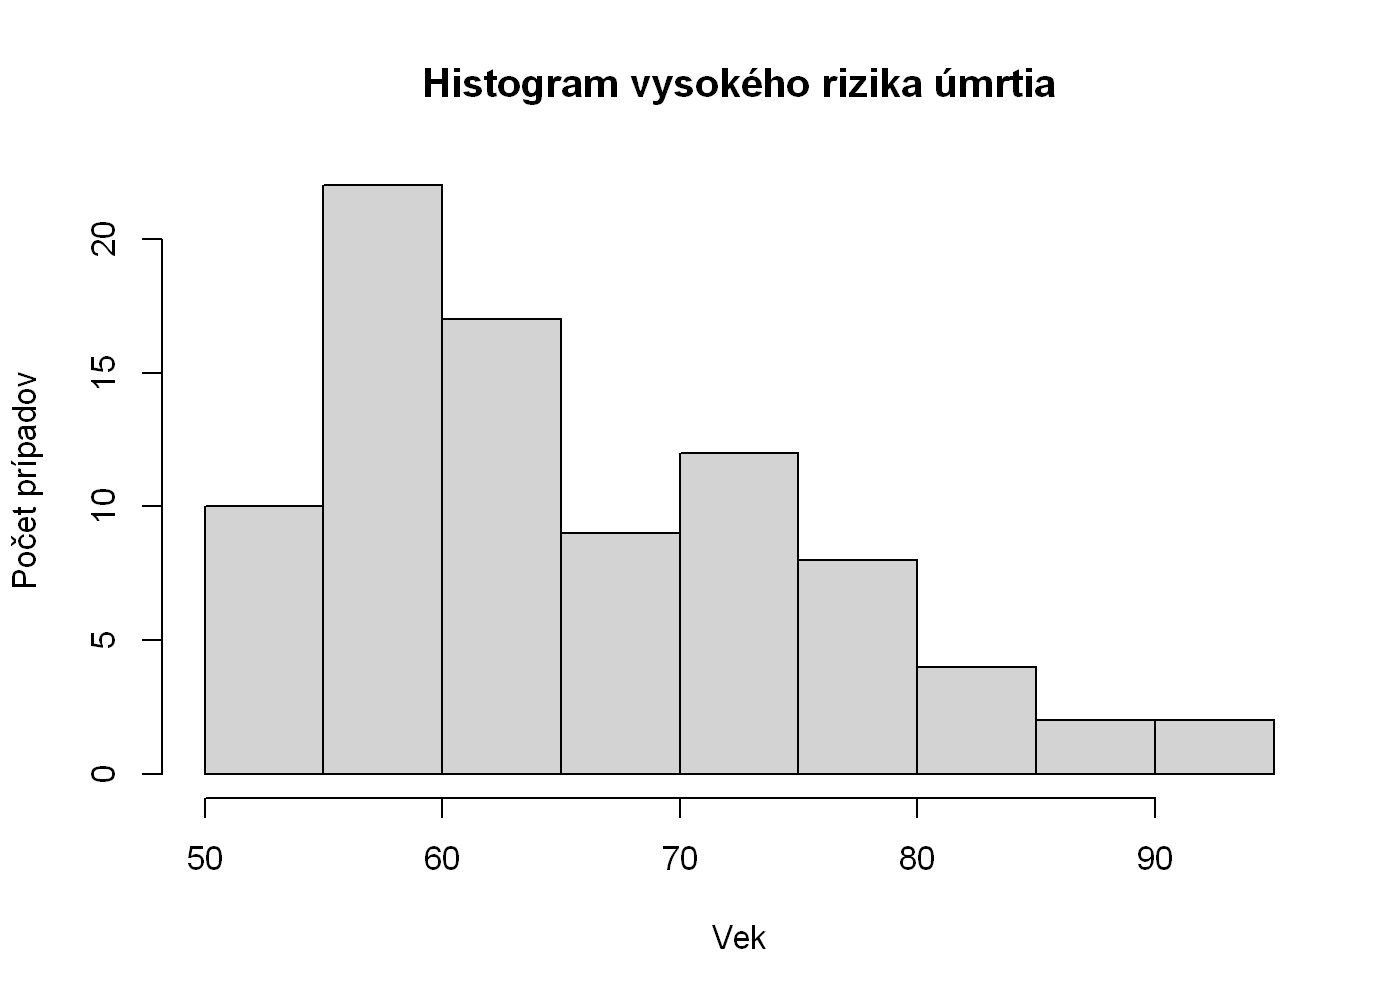

In [41]:
# Vytvorenie tabuľky počtu prípadov podľa veku a stavu zlyhania srdca
high_risk_data <- filter(data_hw, risk == 'High')

# Vykreslenie histogramu veku pre záznamy s vysokým rizikom úmrtia
hist(high_risk_data$age, main = 'Histogram vysokého rizika úmrtia', xlab = 'Vek', ylab = 'Počet prípadov')
age_failure_table <- table(data_hw$age, data_hw$risk)

# Nájdenie veku s najväčším počtom prípadov zlyhania srdca
max_failure_age <- names(which.max(age_failure_table[, 'High']))

# Počet prípadov zlyhania srdca v tejto vekovej kategórii
count_max_failure <- age_failure_table[max_failure_age, 'High']

# Vypísanie veku s najväčším rizikom zlyhania srdca a počtu prípadov
print(paste("Vek s najväčším rizikom zlyhania srdca:", max_failure_age))
print(paste("Počet prípadov zlyhania srdca v tejto vekovej kategórii:", count_max_failure))


**V akom veku je riziko zlyhania srdca najväčšie?**

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

- korelácia sa dá analyzovať iba na numerických premenných, preto musíte dátový typ premennej zmeniť na kategorický a ten uložiť vo formáte 'integer' alebo 'numeric'.


In [44]:
numeric_data_hw <- data_hw[, sapply(data_hw, is.numeric)]

correlation_matrix <- cor(numeric_data_hw)

position <- which(correlation_matrix == max(correlation_matrix[lower.tri(correlation_matrix)]), arr.ind = TRUE)

attributes <- rownames(correlation_matrix)[position[1,1]]
attributes <- c(attributes, colnames(correlation_matrix)[position[1,2]])

print(paste("Atribúty s najväčšou zápornou koreláciou:", paste(attributes, collapse = ", ")))


[1] "Atribúty s najväčšou zápornou koreláciou: smoking, sex"


**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure